In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_excel(r"C:\Users\os 05\python2\day12_EDA\Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# Removing rows with missing values in key columns
df = df.dropna(subset=["Description", "Quantity", "UnitPrice"])
df = df[df["Quantity"] > 0]  # Remove negative quantities


In [ ]:
# Removing cancelled invoices (InvoiceNo starts with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith('C')]

In [13]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]


In [ ]:
# Grouping by product description and sum the revenue
product_profit = df.groupby("Description")["Revenue"].sum().sort_values(ascending=False)

# Convert to DataFrame and reset index
top_products = product_profit.reset_index().rename(columns={"Revenue": "Total Revenue"})


In [ ]:
# Showing top 10
top_products.head(10)


,Description,Total Revenue
0,DOTCOM POSTAGE,206248.77
1,REGENCY CAKESTAND 3 TIER,174484.74
2,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
4,PARTY BUNTING,99504.33
5,JUMBO BAG RED RETROSPOT,94340.05
6,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
7,Manual,78112.82
8,POSTAGE,78101.88
9,RABBIT NIGHT LIGHT,66964.99


C:\Users\os 05\AppData\Local\Temp\ipykernel_16100\1959359964.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products.head(10), x="Total Revenue", y="Description", palette="viridis")


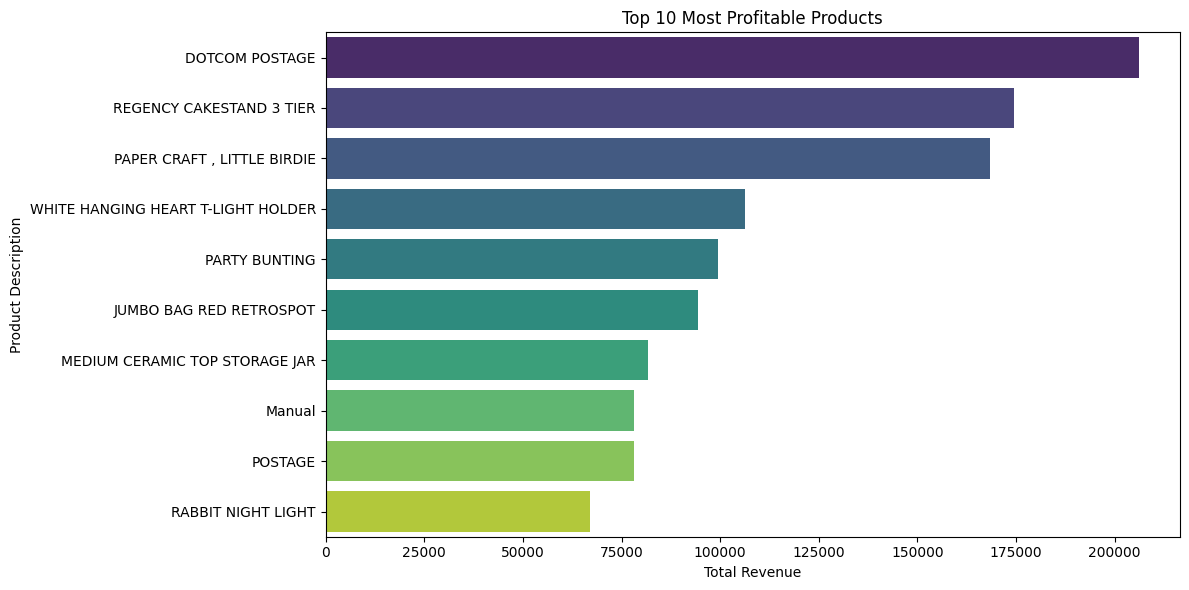

In [16]:
# Plotting the top 10 most profitable products

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products.head(10), x="Total Revenue", y="Description", palette="viridis")
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()


"I identified the top 10 most profitable products based on revenue (Quantity × UnitPrice), after cleaning the dataset by removing returns and cancelled transactions. This insight can help businesses prioritize marketing or stocking decisions."